In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    import holidays
except:
    !pip install holidays
finally:
    import holidays

In [2]:
# Data Dirs
TRAFFIC_DATA_PATH = [
    '../data/traffic_flow_2018.csv',
    '../data/traffic_flow_2019.csv'
]

In [3]:
pd.set_option("display.max_colwidth", 500)
pt_holidays = holidays.CountryHoliday('Portugal')

In [4]:
#def load_resample_data(files_name):


def load_data(data_paths, date_col, value_cols, agg_operation = 'sum'):
    concat_data = []

    for file in data_paths:
        print("Reading file ", file)
        df = pd.read_csv('../data/' + file, encoding='latin-1')
        
        # print(df.head())

        df[date_col] = pd.to_datetime(df[date_col])
        df_resampled = df.set_index(date_col).groupby('entity_id')[value_cols].resample('H').agg(agg_operation).reset_index()
        concat_data.append(df_resampled)

    return pd.concat(concat_data)

In [5]:
date_col = 'dateobservedfrom'
value_cols = ['intensity']
files_name = TRAFFIC_DATA_PATH

traffic_data = load_data(files_name, date_col, value_cols, agg_operation = 'sum')

Reading file  ../data/traffic_flow_2018.csv
Reading file  ../data/traffic_flow_2019.csv


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
# traffic_data.rename(columns={'dateobservedfrom': 'dateobservedfrom'}, inplace=True)

In [7]:
traffic_data.head()

,entity_id,dateobservedfrom,intensity
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75


In [28]:
data_entities = pd.read_csv('../data/data_entities.csv', delimiter=",", encoding="latin-1", header=0, index_col=False)

In [29]:
data_entities.head()

,entity_id,name,latitude,longitude,entity_type,street,start_date,end_date
0,testsixsq,Rua dos Campeï¿½es Europeus,41.162589760000003,-8.5851981169999991,TrafficFlowObserved,Rua dos Campeï¿½es Europeus,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z3,R. Camï¿½es - N-S,41.154959804999997,-8.6100910160000002,TrafficFlowObserved,Rua de Camï¿½es,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z4,Av. Boavista - Casa da Mï¿½sica - E-O,41.158700713000002,-8.6335461250000005,TrafficFlowObserved,Avenida da Boavista,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z5,Via Panorï¿½mica - Faixa BUS,41.151096148000001,-8.6338182700000008,TrafficFlowObserved,Rua de Entre Campos,NaN,NaN


In [68]:
df_resampled = traffic_data.merge(data_entities, on='entity_id')
df_resampled.head()

,entity_id,dateobservedfrom,intensity,name,latitude,longitude,entity_type,street,start_date,end_date
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN


In [69]:
df_resampled['day'] = df_resampled['dateobservedfrom'].dt.day
df_resampled['hour'] = df_resampled['dateobservedfrom'].dt.hour
df_resampled['month'] = df_resampled['dateobservedfrom'].dt.month
df_resampled['dayofweek'] = df_resampled['dateobservedfrom'].dt.dayofweek
# dt.day_name(locale = 'English') (to get the days of the week by name)
df_resampled['year'] = df_resampled['dateobservedfrom'].dt.year
df_resampled['quarter'] = df_resampled['dateobservedfrom'].dt.year
df_resampled['week'] = df_resampled['dateobservedfrom'].dt.isocalendar().week
df_resampled['is_holiday'] = df_resampled['dateobservedfrom'].apply(lambda x: x in pt_holidays)
df_resampled.head()

,entity_id,dateobservedfrom,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,day,hour,month,dayofweek,year,quarter,week,is_holiday
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN,31,0,12,6,2017,2017,52,False
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN,31,1,12,6,2017,2017,52,False
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN,31,2,12,6,2017,2017,52,False
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN,31,3,12,6,2017,2017,52,False
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75,R. Fernandes Tomï¿½s - 24 de Agosto,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,Rua de Fernandes Tomï¿½s,NaN,NaN,31,4,12,6,2017,2017,52,False


In [70]:
# Let's first remove columns we don't need
df_resampled.drop(columns =['name', 'street', "start_date", "end_date", "is_holiday"], inplace=True)
df_resampled.head()

,entity_id,dateobservedfrom,intensity,latitude,longitude,entity_type,day,hour,month,dayofweek,year,quarter,week
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,31,0,12,6,2017,2017,52
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,31,1,12,6,2017,2017,52
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,31,2,12,6,2017,2017,52
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,31,3,12,6,2017,2017,52
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75,41.148405920000002,-8.5990938559999996,TrafficFlowObserved,31,4,12,6,2017,2017,52


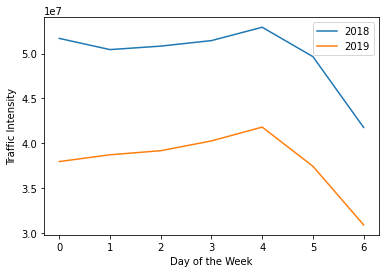

In [91]:
# Traffic flow per day
tmp = df_resampled.copy().groupby(["year", "dayofweek"]).sum().reset_index()[["year", "dayofweek", "intensity"]]
tmp = tmp[tmp["year"] > 2017]

# Create plots by day of the week + year
for year in tmp["year"].unique():
    plt.plot(tmp[tmp["year"]==year]["dayofweek"].values, tmp[tmp["year"]==year]["intensity"].values, label=f"{year}")

plt.xlabel("Day of the Week")
plt.ylabel("Traffic Intensity")
plt.legend()
plt.show()

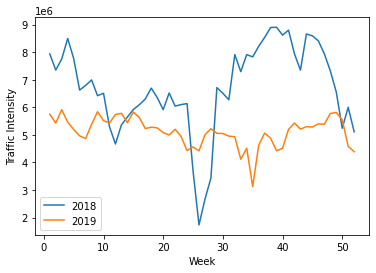

In [84]:
# traffic flow per week
tmp = df_resampled.copy().groupby(["year", "week"]).sum().reset_index()[["year", "week", "intensity"]]
tmp = tmp[tmp["year"] > 2017]

# Create plots by week
for year in tmp["year"].unique():
    plt.plot(tmp[tmp["year"]==year]["week"].values, tmp[tmp["year"]==year]["intensity"].values, label=f"{year}")

# plt.xticks(range(1, max(tmp["week"].unique())+1))
plt.xlabel("Week")
plt.ylabel("Traffic Intensity")
plt.legend()
plt.show()

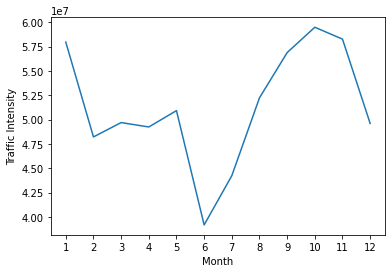

In [62]:
# traffic flow aggregated per month for all years (to check for sazonality)
tmp = df_resampled.copy().groupby(["month"]).sum().reset_index()
tmp = tmp[["month", "intensity"]]

# Plot Values
plt.plot(tmp["month"].values, tmp["intensity"].values)
plt.xticks(range(1, 13, 1))
plt.xlabel("Month")
plt.ylabel("Traffic Intensity")
plt.show()

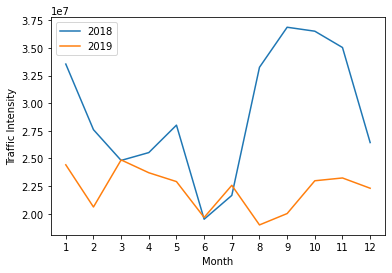

In [85]:
# traffic flow aggregated per month+year 
tmp = df_resampled.copy().groupby(["month", "year"]).sum().reset_index()
tmp = tmp[tmp["year"] > 2017]
tmp = tmp[["month", "year", "intensity"]]

# Create plots by month & years
for year in tmp["year"].unique():
    plt.plot(tmp[tmp["year"]==year]["month"].values, tmp[tmp["year"]==year]["intensity"].values, label=f"{year}")

plt.xticks(range(1, 13, 1))
plt.xlabel("Month")
plt.ylabel("Traffic Intensity")
plt.legend()
plt.show()

In [45]:
# Check this plot for ideas: https://www.researchgate.net/figure/A-heat-map-matrix-visualization-for-traffic-congestion-analysis-21_fig2_330420317 